In [1]:
# filename: graph.ipynb
# purpose: data visualize analysis

# OHT data visualize analysis 

### Proessing flow
- 데이터 체크 - column and value
- 통계 분석 - statistics
- 추이 분석 - lineplot,
- 분산 분석 - historam, boxplot, violinplot

In [2]:
# packages
import time
import pathlib
import pandas as pd

import humanfriendly as human

import ohtconf as conf
import ohtcomm as comm
import ohtgraph as graph

In [3]:
# prevent jupyter nbconvert warning at Windows
import asyncio
import platform

if platform.system() == 'Windows':
    asyncio.set_event_loop_policy(asyncio.WindowsSelectorEventLoopPolicy())


## Main

In [4]:
mainstart = time.time()

In [5]:
# set float display format
pd.set_option("display.float_format", "{:.1f}".format)

In [6]:
# recreate chart output directory
comm.remove_directory(conf.DIRCHART)

pathlib.Path(conf.DIRCHART).mkdir(parents=True, exist_ok=True)  # create directory of pngfiles

In [7]:
# dataframe slice for chart
xs = conf.CHARTSLICE
# update this value to effect on this file
# xs = slice(conf.CHARTSLICE.start, conf.CHARTSLICE.stop, conf.CHARTSLICE.step)
print(f"chart dataframe slice={xs}")

chart dataframe slice=slice(600, 1100, 1)


In [8]:
# default plot size
# update conf.PLOTSIZE to effect on the graph.py functions
conf.PLOTSIZE = [conf.PLOTSIZE[0], conf.PLOTSIZE[1]]
print(f"chart plotsize={conf.PLOTSIZE}")

chart plotsize=[7, 5]


### 데이터 첵크 

In [9]:
# read table data
_start = time.time()

dfnoise = comm.read_tabdf(conf.TABNAME_NOISE)
dfnoise.sort_values(by=conf.COLUMN_NAMES[0], inplace=True)
dfnoise.reset_index(drop=True, inplace=True)

dfnorm = comm.read_tabdf(conf.TABNAME_NORM)
dfnorm.sort_values(by=conf.COLUMN_NAMES[0], inplace=True)
dfnorm.reset_index(drop=True, inplace=True)

dfoutl = comm.read_tabdf(conf.TABNAME_OUTL)
dfoutl.sort_values(by=conf.COLUMN_NAMES[0], inplace=True)
dfoutl.reset_index(drop=True, inplace=True)

_elapsed = time.time() - _start
print(f"Rea elapsed time: {human.format_timespan(_elapsed)}")

Rea elapsed time: 0.11 seconds


In [10]:
# data count
print(f"row count noise={len(dfnoise)}, norm={len(dfnorm)}, outl={len(dfoutl)}")

row count noise=0, norm=108000, outl=36000


In [11]:
# null checking
#dfnorm.info()

In [12]:
# null checking
#dfoutl.info()

In [13]:
# data sample check
dfnorm.head()

,DATETM,TEM,PM1,PM2_5,PM10,CO,NH3,CT1,CT2,CT3,CT4,MVAVG_TEM,MVSTD_TEM,MVSIG_TEM,MVAVG_PM1,MVSTD_PM1,MVSIG_PM1,MVAVG_PM2_5,MVSTD_PM2_5,MVSIG_PM2_5,MVAVG_PM10,MVSTD_PM10,MVSIG_PM10,MVAVG_CO,MVSTD_CO,MVSIG_CO,MVAVG_NH3,MVSTD_NH3,MVSIG_NH3,MVAVG_CT1,MVSTD_CT1,MVSIG_CT1,MVAVG_CT2,MVSTD_CT2,MVSIG_CT2,MVAVG_CT3,MVSTD_CT3,MVSIG_CT3,MVAVG_CT4,MVSTD_CT4,MVSIG_CT4,FLAG
0,2024-01-01 00:00:00.000,40.8,10,12,13,161,88,0.8,1.0,0.5,0.6,40.8,0.0,1,10.0,0.0,1,12.0,0.0,1,13.0,0.0,1,161.0,0.0,1,88.0,0.0,1,0.8,0.0,1,1.0,0.0,1,0.5,0.0,1,0.6,0.0,1,0
1,2024-01-01 00:00:00.100,40.8,10,12,13,161,88,0.8,1.0,0.5,0.6,40.8,0.0,1,10.0,0.0,1,12.0,0.0,1,13.0,0.0,1,161.0,0.0,1,88.0,0.0,1,0.8,0.0,1,1.0,0.0,1,0.5,0.0,1,0.6,0.0,1,0
2,2024-01-01 00:00:00.200,40.8,10,12,13,161,88,0.8,1.0,0.5,0.5,40.8,0.0,1,10.0,0.0,1,12.0,0.0,1,13.0,0.0,1,161.0,0.0,1,88.0,0.0,1,0.8,0.0,1,1.0,0.0,1,0.5,0.0,1,0.6,0.1,1,0
3,2024-01-01 00:00:00.300,40.8,10,12,13,161,88,0.9,1.0,0.5,0.6,40.8,0.0,1,10.0,0.0,1,12.0,0.0,1,13.0,0.0,1,161.0,0.0,1,88.0,0.0,1,0.8,0.0,1,1.0,0.0,1,0.5,0.0,1,0.6,0.1,1,0
4,2024-01-01 00:00:00.400,40.8,10,12,13,161,88,0.8,1.0,0.7,0.6,40.8,0.0,1,10.0,0.0,1,12.0,0.0,1,13.0,0.0,1,161.0,0.0,1,88.0,0.0,1,0.8,0.0,1,1.0,0.0,1,0.5,0.1,1,0.6,0.0,1,0


In [14]:
# data sample check
dfoutl.head()

,DATETM,TEM,PM1,PM2_5,PM10,CO,NH3,CT1,CT2,CT3,CT4,MVAVG_TEM,MVSTD_TEM,MVSIG_TEM,MVAVG_PM1,MVSTD_PM1,MVSIG_PM1,MVAVG_PM2_5,MVSTD_PM2_5,MVSIG_PM2_5,MVAVG_PM10,MVSTD_PM10,MVSIG_PM10,MVAVG_CO,MVSTD_CO,MVSIG_CO,MVAVG_NH3,MVSTD_NH3,MVSIG_NH3,MVAVG_CT1,MVSTD_CT1,MVSIG_CT1,MVAVG_CT2,MVSTD_CT2,MVSIG_CT2,MVAVG_CT3,MVSTD_CT3,MVSIG_CT3,MVAVG_CT4,MVSTD_CT4,MVSIG_CT4,FLAG
0,2024-01-01 00:00:00.000,40.8,10,12,13,161,88,0.8,1.0,0.5,0.6,40.8,0.0,1,10.0,0.0,1,12.0,0.0,1,13.0,0.0,1,161.0,0.0,1,88.0,0.0,1,0.8,0.0,1,1.0,0.0,1,0.5,0.0,1,0.6,0.0,1,1
1,2024-01-01 00:00:00.100,40.9,10,12,13,162,88,0.8,1.0,0.5,0.6,40.8,0.0,1,10.0,0.0,1,12.0,0.0,1,13.0,0.0,1,161.0,0.0,1,88.0,0.0,1,0.8,0.0,1,1.0,0.0,1,0.5,0.0,1,0.6,0.0,1,1
2,2024-01-01 00:00:00.200,41.0,11,13,14,162,89,0.8,1.0,0.6,0.6,40.8,0.0,1,10.0,0.0,1,12.0,0.0,1,13.0,0.0,1,161.0,0.0,1,88.0,0.0,1,0.8,0.0,1,1.0,0.0,1,0.5,0.0,1,0.6,0.1,1,1
3,2024-01-01 00:00:00.300,41.3,11,13,14,162,89,0.8,1.1,0.6,0.7,40.8,0.0,1,10.0,0.0,1,12.0,0.0,1,13.0,0.0,1,161.0,0.0,1,88.0,0.0,1,0.8,0.0,1,1.0,0.0,1,0.5,0.0,1,0.6,0.1,1,1
4,2024-01-01 00:00:00.400,41.3,11,14,14,163,89,0.9,1.1,0.6,0.7,40.8,0.0,1,10.0,0.0,1,12.0,0.0,1,13.0,0.0,1,161.0,0.0,1,88.0,0.0,1,0.8,0.0,1,1.0,0.0,1,0.5,0.1,1,0.6,0.0,1,1


### 테이터 통계 분석

In [15]:
# data statistics
dfnorm.describe()

,DATETM,TEM,PM1,PM2_5,PM10,CO,NH3,CT1,CT2,CT3,CT4,MVAVG_TEM,MVSTD_TEM,MVSIG_TEM,MVAVG_PM1,MVSTD_PM1,MVSIG_PM1,MVAVG_PM2_5,MVSTD_PM2_5,MVSIG_PM2_5,MVAVG_PM10,MVSTD_PM10,MVSIG_PM10,MVAVG_CO,MVSTD_CO,MVSIG_CO,MVAVG_NH3,MVSTD_NH3,MVSIG_NH3,MVAVG_CT1,MVSTD_CT1,MVSIG_CT1,MVAVG_CT2,MVSTD_CT2,MVSIG_CT2,MVAVG_CT3,MVSTD_CT3,MVSIG_CT3,MVAVG_CT4,MVSTD_CT4,MVSIG_CT4,FLAG
count,108000,108000.0,108000.0,108000.0,108000.0,108000.0,108000.0,108000.0,108000.0,108000.0,108000.0,108000.0,108000.0,108000.0,108000.0,108000.0,108000.0,108000.0,108000.0,108000.0,108000.0,108000.0,108000.0,108000.0,108000.0,108000.0,108000.0,108000.0,108000.0,108000.0,108000.0,108000.0,108000.0,108000.0,108000.0,108000.0,108000.0,108000.0,108000.0,108000.0,108000.0,108000.0
mean,2024-01-01 01:29:59.950000128,40.5,11.0,12.4,13.7,162.6,88.5,0.8,1.0,0.5,0.5,40.5,0.0,1.0,11.0,1.3,1.0,12.4,0.5,1.0,13.7,0.9,1.0,162.6,2.0,1.0,88.5,0.7,1.0,0.8,0.1,1.0,1.0,0.1,1.0,0.5,0.1,1.0,0.5,0.1,1.0,0.0
min,2024-01-01 00:00:00,40.4,9.0,11.0,12.0,134.0,74.0,0.6,0.8,0.3,0.3,40.5,0.0,1.0,9.9,0.0,1.0,11.9,0.0,1.0,12.9,0.0,1.0,160.0,0.0,1.0,87.5,0.0,1.0,0.8,0.0,1.0,1.0,0.0,1.0,0.5,0.0,1.0,0.5,0.0,1.0,0.0
25%,2024-01-01 00:44:59.975000064,40.5,10.0,12.0,13.0,161.0,88.0,0.8,1.0,0.4,0.5,40.5,0.0,1.0,10.6,1.2,1.0,12.2,0.4,1.0,13.4,0.8,1.0,161.9,1.4,1.0,88.1,0.5,1.0,0.8,0.1,1.0,1.0,0.1,1.0,0.5,0.1,1.0,0.5,0.1,1.0,0.0
50%,2024-01-01 01:29:59.950000128,40.5,10.0,12.0,13.0,163.0,89.0,0.8,1.0,0.5,0.5,40.5,0.0,1.0,10.9,1.4,1.0,12.3,0.5,1.0,13.7,0.9,1.0,162.8,1.5,1.0,88.6,0.6,1.0,0.8,0.1,1.0,1.0,0.1,1.0,0.5,0.1,1.0,0.5,0.1,1.0,0.0
75%,2024-01-01 02:14:59.924999936,40.6,13.0,13.0,15.0,164.0,89.0,0.9,1.0,0.5,0.6,40.6,0.1,1.0,11.4,1.5,1.0,12.5,0.5,1.0,14.0,1.0,1.0,163.4,1.7,1.0,88.8,0.6,1.0,0.8,0.1,1.0,1.0,0.1,1.0,0.5,0.1,1.0,0.5,0.1,1.0,0.0
max,2024-01-01 02:59:59.900000,40.9,15.0,19.0,26.0,170.0,92.0,1.0,1.2,0.8,0.7,40.8,0.1,1.0,12.9,1.7,1.0,13.3,1.5,1.0,15.6,3.2,1.0,164.7,5.6,1.0,89.3,2.2,1.0,0.8,0.1,1.0,1.0,0.1,1.0,0.5,0.1,1.0,0.6,0.1,1.0,0.0
std,NaN,0.1,1.4,0.5,1.0,2.5,0.9,0.1,0.1,0.1,0.1,0.1,0.0,0.0,0.6,0.3,0.0,0.2,0.1,0.0,0.4,0.3,0.0,0.9,1.1,0.0,0.4,0.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
# data statistics
dfoutl.describe()

,DATETM,TEM,PM1,PM2_5,PM10,CO,NH3,CT1,CT2,CT3,CT4,MVAVG_TEM,MVSTD_TEM,MVSIG_TEM,MVAVG_PM1,MVSTD_PM1,MVSIG_PM1,MVAVG_PM2_5,MVSTD_PM2_5,MVSIG_PM2_5,MVAVG_PM10,MVSTD_PM10,MVSIG_PM10,MVAVG_CO,MVSTD_CO,MVSIG_CO,MVAVG_NH3,MVSTD_NH3,MVSIG_NH3,MVAVG_CT1,MVSTD_CT1,MVSIG_CT1,MVAVG_CT2,MVSTD_CT2,MVSIG_CT2,MVAVG_CT3,MVSTD_CT3,MVSIG_CT3,MVAVG_CT4,MVSTD_CT4,MVSIG_CT4,FLAG
count,36000,36000.0,36000.0,36000.0,36000.0,36000.0,36000.0,36000.0,36000.0,36000.0,36000.0,36000.0,36000.0,36000.0,36000.0,36000.0,36000.0,36000.0,36000.0,36000.0,36000.0,36000.0,36000.0,36000.0,36000.0,36000.0,36000.0,36000.0,36000.0,36000.0,36000.0,36000.0,36000.0,36000.0,36000.0,36000.0,36000.0,36000.0,36000.0,36000.0,36000.0,36000.0
mean,2024-01-01 00:29:59.950000128,44.3,18.5,19.3,20.1,169.4,93.1,1.3,1.4,1.1,1.1,40.6,0.0,1.0,11.0,1.3,1.0,12.3,0.4,1.0,13.7,0.9,1.0,162.6,2.0,1.0,88.6,0.7,1.0,0.8,0.1,1.0,1.0,0.1,1.0,0.5,0.1,1.0,0.5,0.1,1.0,1.0
min,2024-01-01 00:00:00,40.5,10.0,12.0,13.0,161.0,88.0,0.8,1.0,0.5,0.5,40.5,0.0,1.0,9.9,0.0,1.0,11.9,0.0,1.0,12.9,0.0,1.0,160.7,0.0,1.0,87.6,0.0,1.0,0.8,0.0,1.0,1.0,0.0,1.0,0.5,0.0,1.0,0.5,0.0,1.0,1.0
25%,2024-01-01 00:14:59.975000064,40.8,12.0,13.0,14.0,164.0,89.0,0.8,1.0,0.5,0.6,40.5,0.0,1.0,10.5,1.2,1.0,12.2,0.4,1.0,13.4,0.8,1.0,161.7,1.3,1.0,88.3,0.5,1.0,0.8,0.1,1.0,1.0,0.1,1.0,0.5,0.1,1.0,0.5,0.1,1.0,1.0
50%,2024-01-01 00:29:59.950000128,43.6,17.0,18.0,19.0,168.0,92.0,1.2,1.3,1.0,1.0,40.5,0.0,1.0,10.9,1.3,1.0,12.3,0.5,1.0,13.6,0.9,1.0,162.4,1.5,1.0,88.7,0.6,1.0,0.8,0.1,1.0,1.0,0.1,1.0,0.5,0.1,1.0,0.5,0.1,1.0,1.0
75%,2024-01-01 00:44:59.924999936,47.6,25.0,25.0,26.0,176.0,97.0,1.7,1.7,1.6,1.6,40.6,0.1,1.0,11.5,1.5,1.0,12.5,0.5,1.0,14.1,1.0,1.0,163.5,1.7,1.0,88.9,0.6,1.0,0.8,0.1,1.0,1.0,0.1,1.0,0.5,0.1,1.0,0.6,0.1,1.0,1.0
max,2024-01-01 00:59:59.900000,50.0,30.0,30.0,30.0,180.0,100.0,2.0,2.0,2.0,2.0,40.8,0.1,1.0,12.9,1.5,1.0,13.0,0.6,1.0,15.4,1.3,1.0,164.7,5.6,1.0,89.3,2.1,1.0,0.8,0.1,1.0,1.0,0.1,1.0,0.5,0.1,1.0,0.6,0.1,1.0,1.0
std,NaN,3.4,6.8,6.4,5.9,6.3,4.1,0.4,0.4,0.5,0.5,0.1,0.0,0.0,0.6,0.3,0.0,0.2,0.1,0.0,0.5,0.2,0.0,1.1,1.2,0.0,0.4,0.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### 데이터 추이 분석

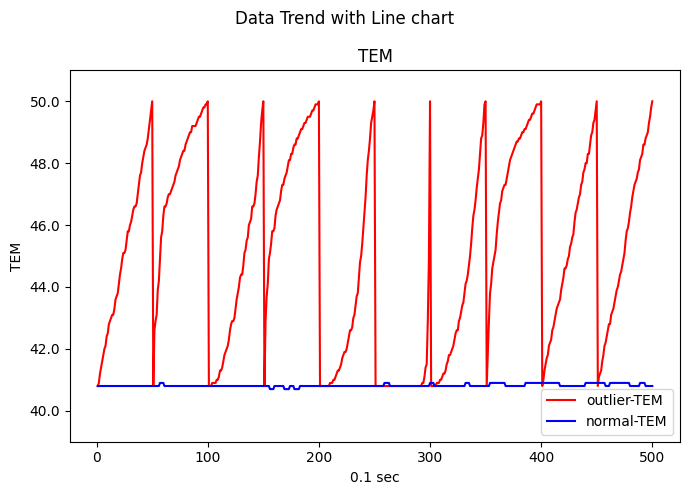

In [17]:
graph.linechart(
    dfs=[dfoutl[xs], dfnorm[xs]],
    labels=["outlier", "normal"],
    cols=conf.COLUMN_TEM,
    grid=(1, 1),
    pngfile="outl-norm-line-tem.png",
)

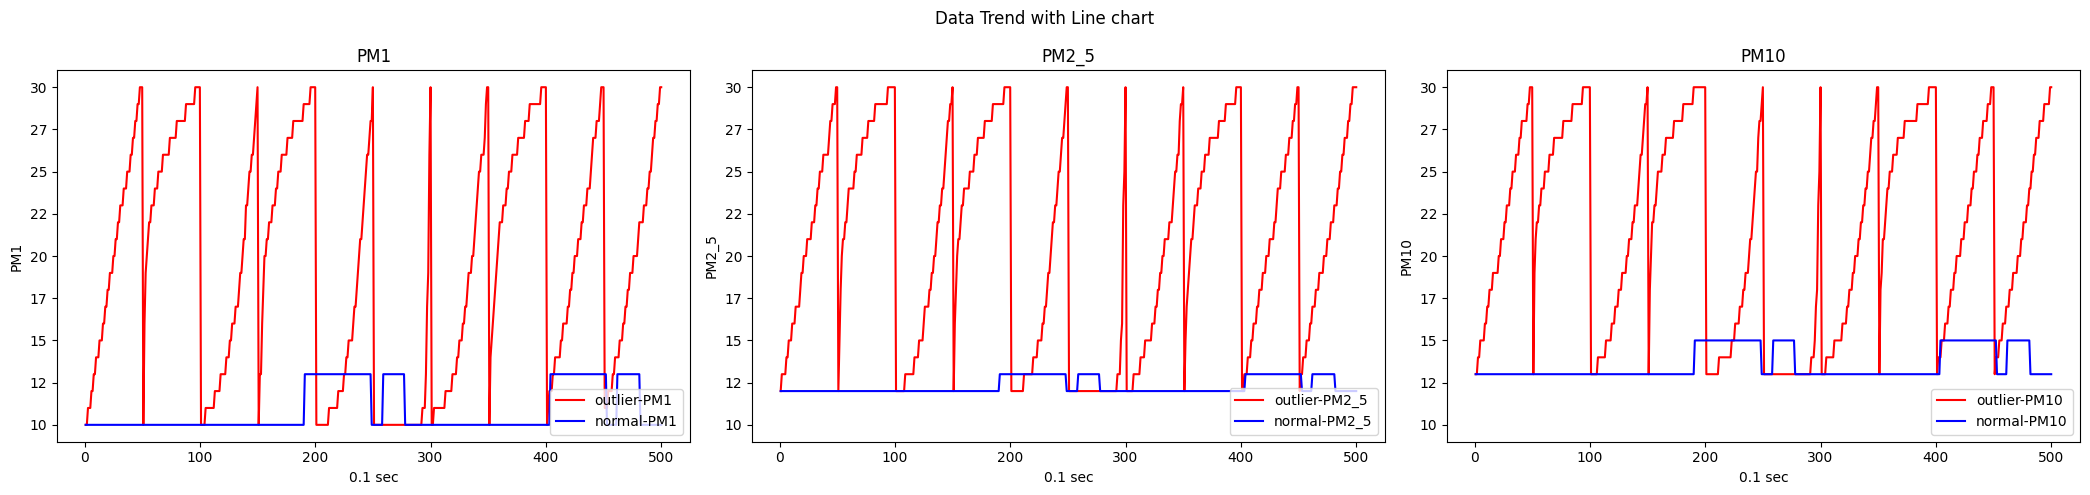

In [18]:
graph.linechart(
    dfs=[dfoutl[xs], dfnorm[xs]],
    labels=["outlier", "normal"],
    cols=conf.COLUMN_PMA,
    grid=(1, len(conf.COLUMN_PMA)),
    pngfile="outl-norm-line-pma.png",
)

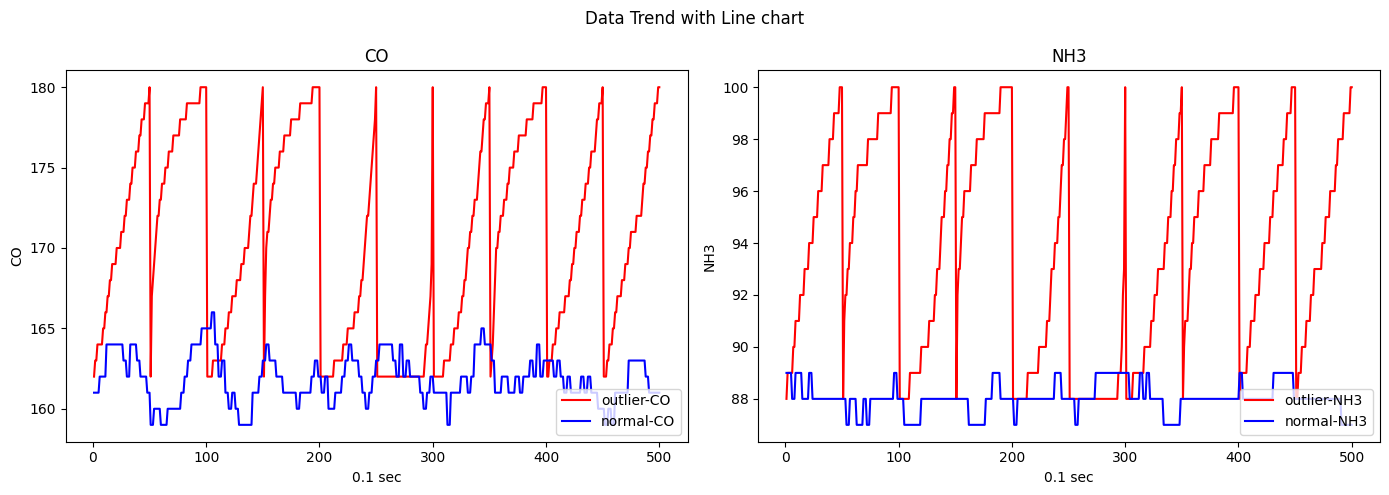

In [19]:
graph.linechart(
    dfs=[dfoutl[xs], dfnorm[xs]],
    labels=["outlier", "normal"],
    cols=conf.COLUMN_COA,
    grid=(1, len(conf.COLUMN_COA)),
    pngfile="outl-norm-line-coa.png",
)

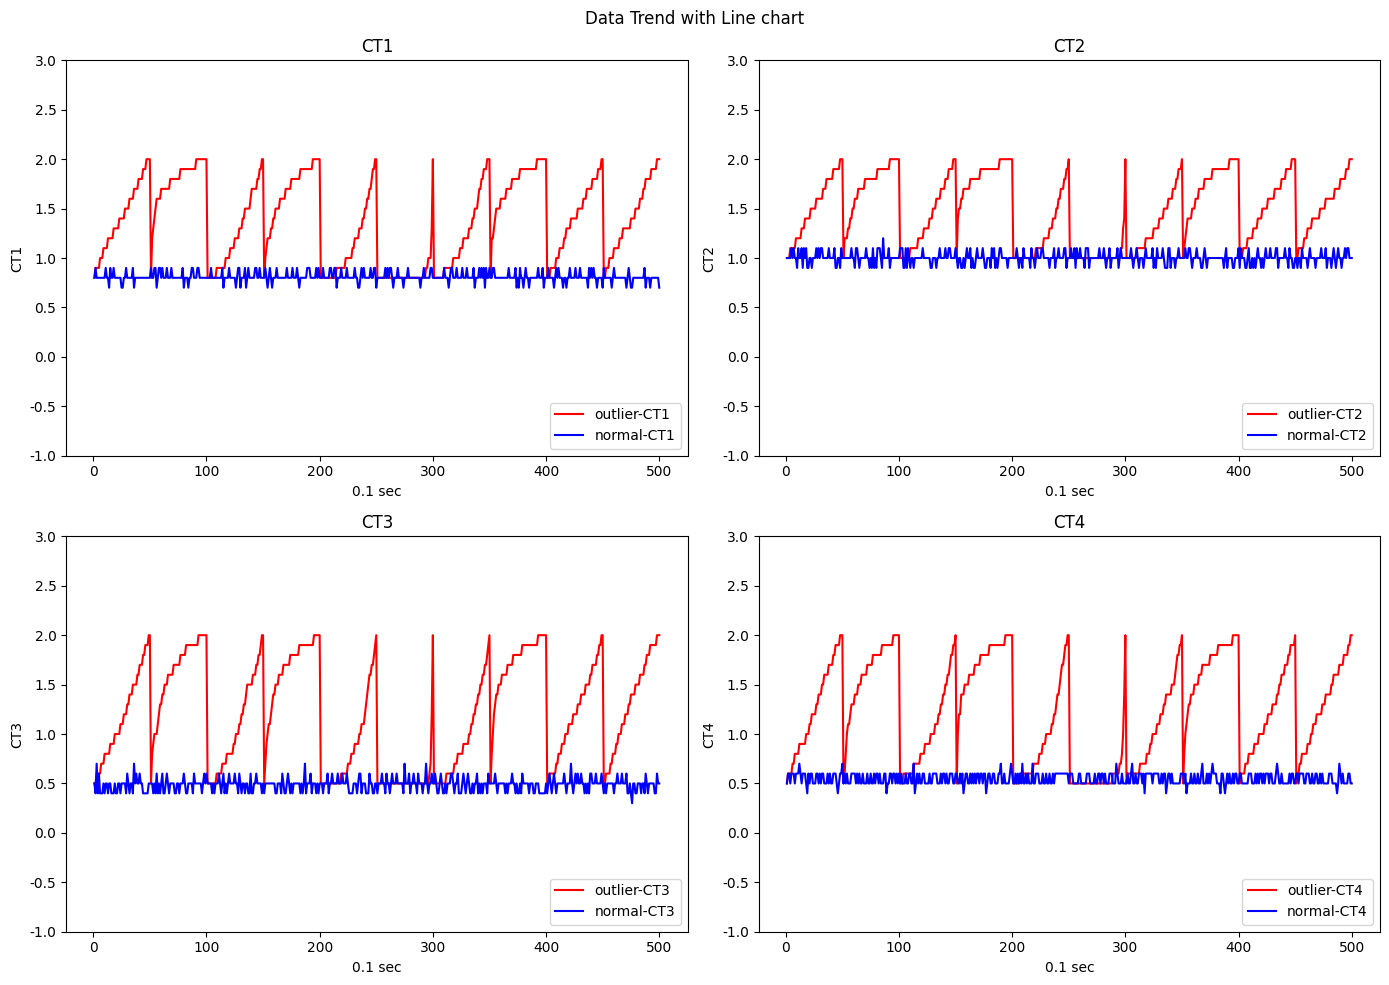

In [20]:
graph.linechart(
    dfs=[dfoutl[xs], dfnorm[xs]],
    labels=["outlier", "normal"],
    cols=conf.COLUMN_CTA,
    grid=(2, 2),
    pngfile="outl-norm-line-cta.png",
)

### 데이터 분산 분석

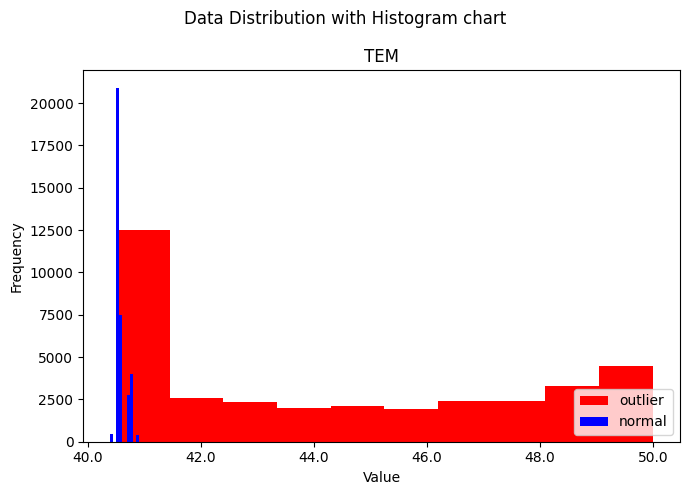

In [21]:
graph.histchart(
    dfs=[dfoutl, dfnorm.iloc[:len(dfoutl)]],
    labels=["outlier", "normal"],
    cols=conf.COLUMN_TEM,
    grid=(1, 1),
    pngfile="outl-norm-hist-tem.png",
)

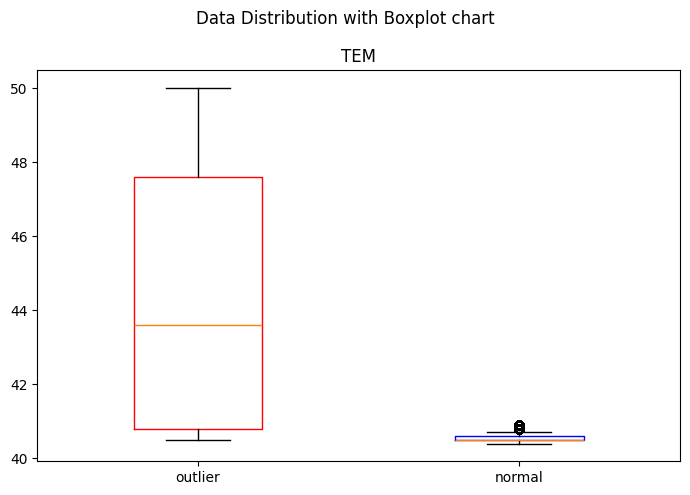

In [22]:
graph.boxchart(
    dfs=[dfoutl, dfnorm.iloc[:len(dfoutl)]],
    labels=["outlier", "normal"],
    cols=conf.COLUMN_TEM,
    grid=(1, 1),
    pngfile="outl-norm-box-tem.png",
)

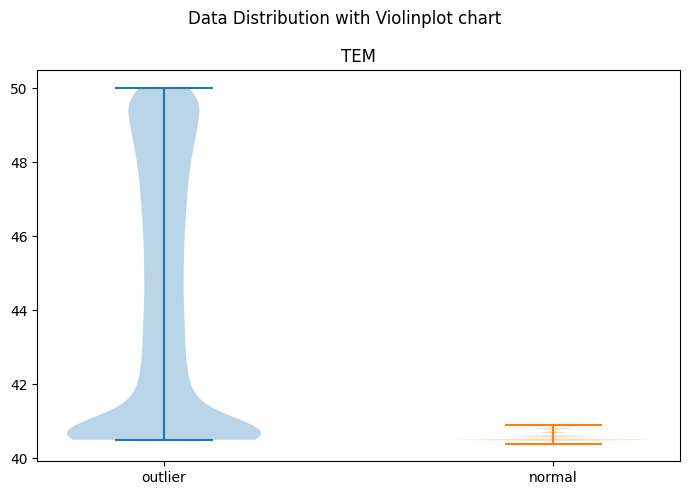

In [23]:
graph.violinchart(
    dfs=[dfoutl, dfnorm.iloc[:len(dfoutl)]],
    labels=["outlier", "normal"],
    cols=conf.COLUMN_TEM,
    grid=(1, 1),
    pngfile="outl-norm-violin-tem.png",
)

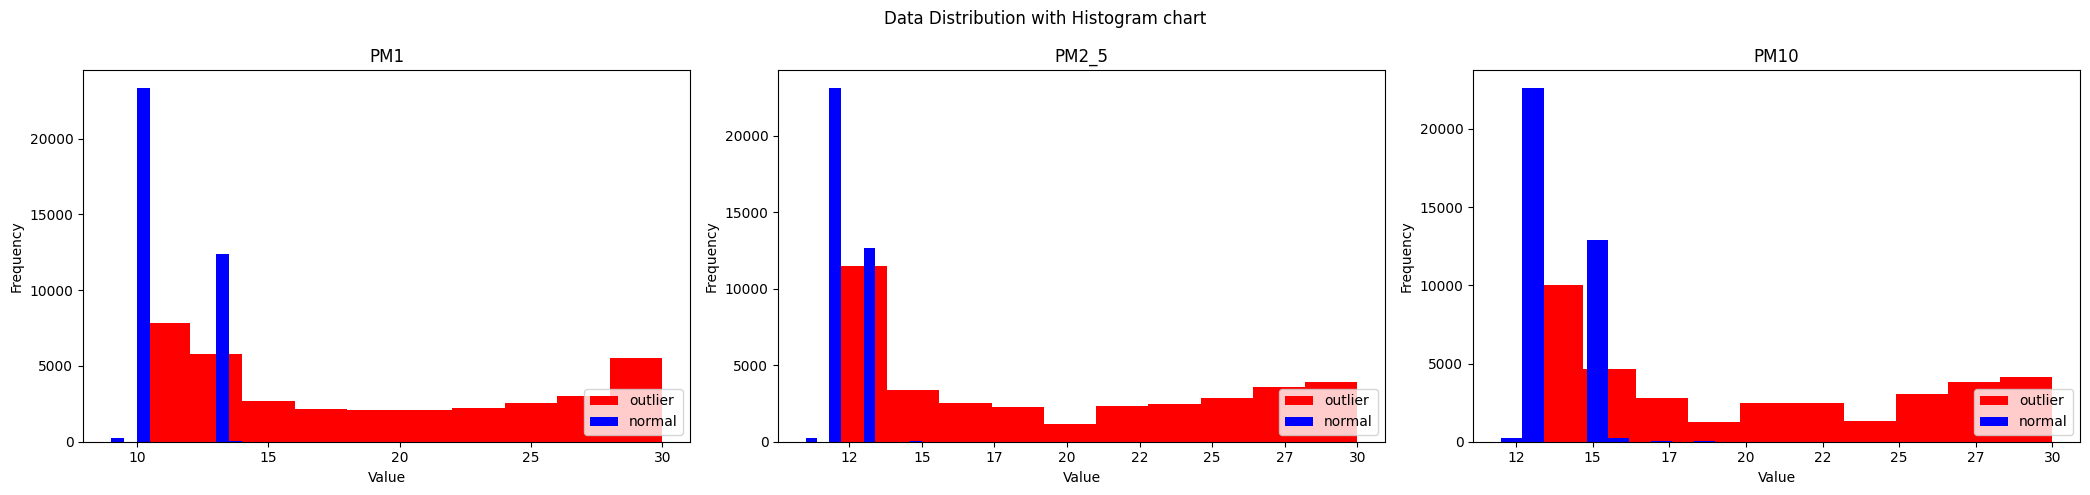

In [24]:
graph.histchart(
    dfs=[dfoutl, dfnorm.iloc[:len(dfoutl)]],
    labels=["outlier", "normal"],
    cols=conf.COLUMN_PMA,
    grid=(1, len(conf.COLUMN_PMA)),
    pngfile="outl-norm-hist-pma.png",
)

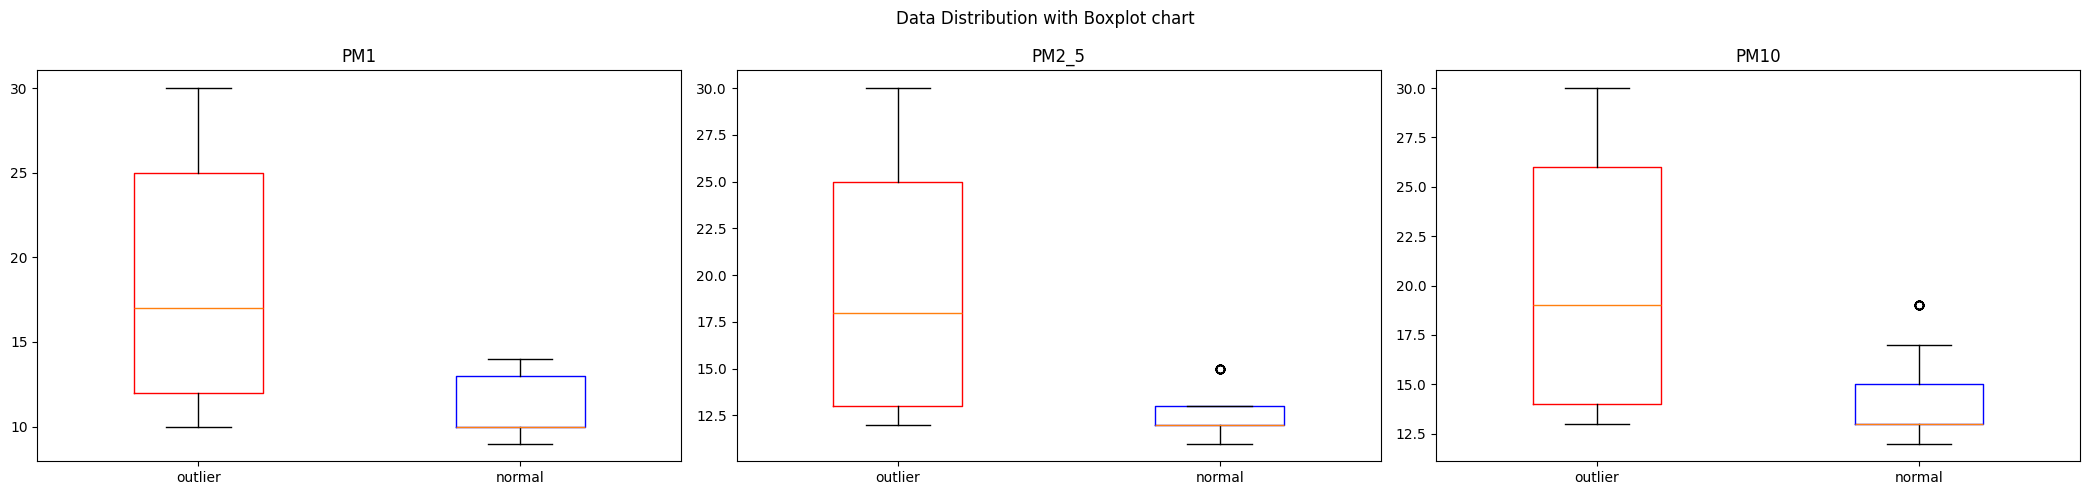

In [25]:
graph.boxchart(
    dfs=[dfoutl, dfnorm.iloc[:len(dfoutl)]],
    labels=["outlier", "normal"],
    cols=conf.COLUMN_PMA,
    grid=(1, len(conf.COLUMN_PMA)),
    pngfile="outl-norm-box-pma.png",
)

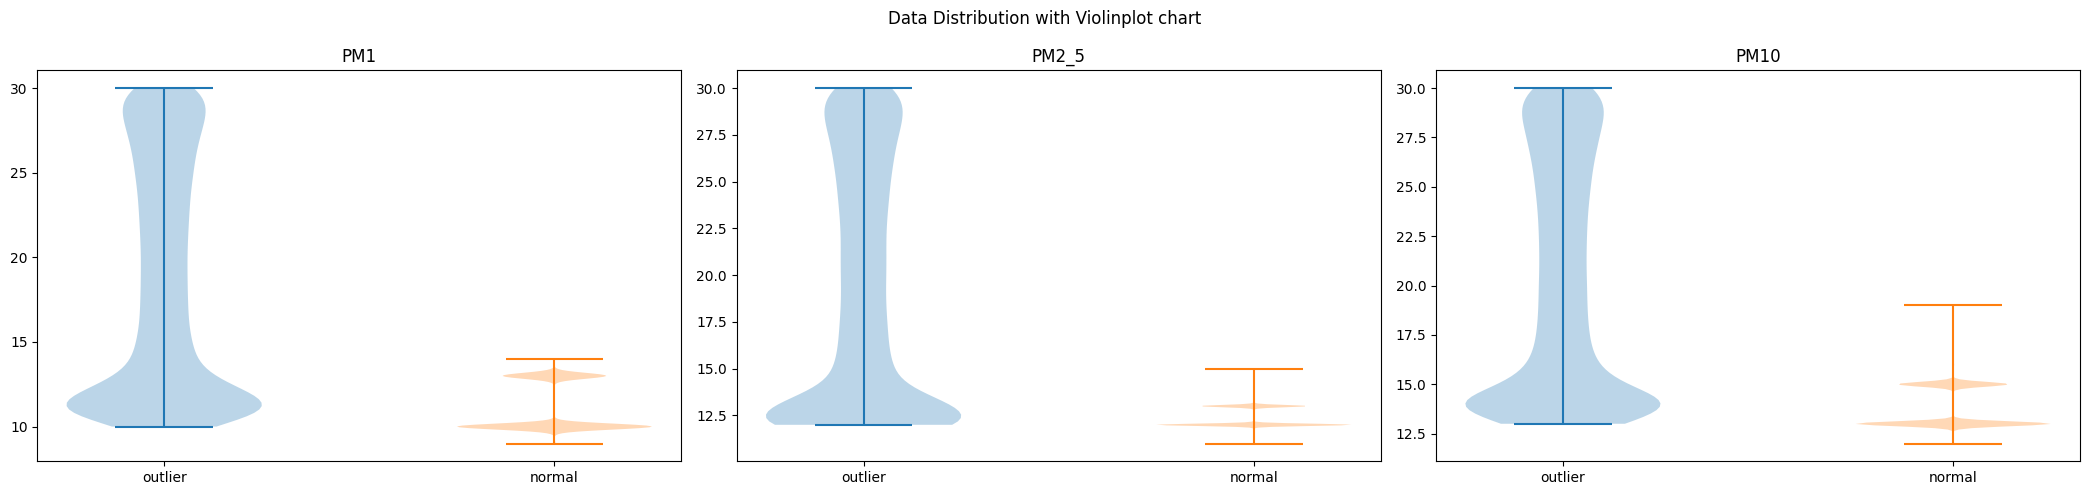

In [26]:
graph.violinchart(
    dfs=[dfoutl, dfnorm.iloc[:len(dfoutl)]],
    labels=["outlier", "normal"],
    cols=conf.COLUMN_PMA,
    grid=(1, len(conf.COLUMN_PMA)),
    pngfile="outl-norm-violin-pma.png",
)

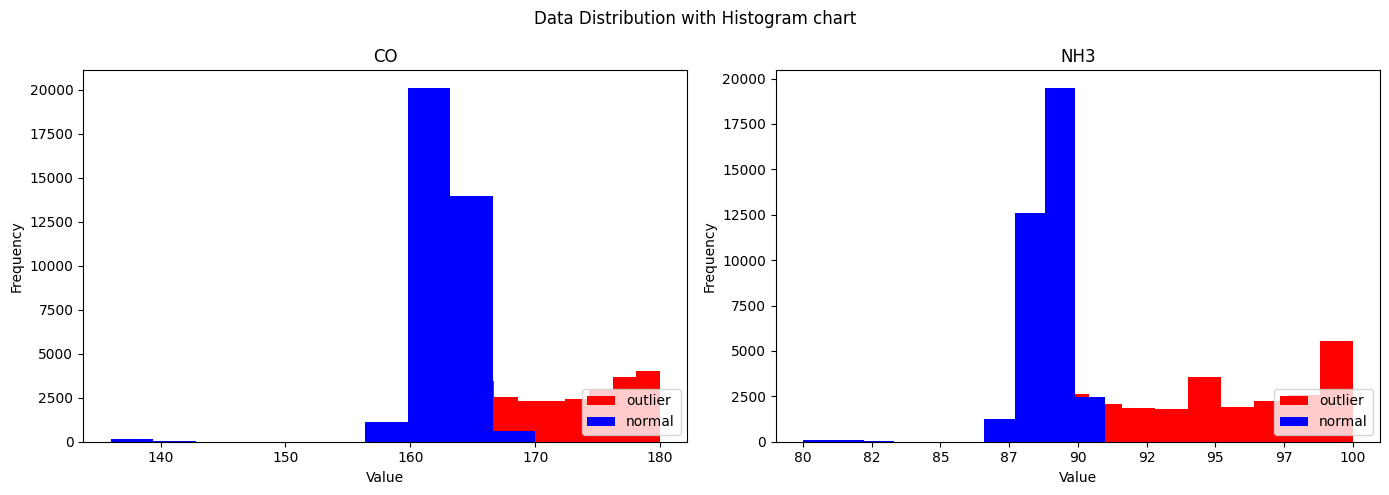

In [27]:
graph.histchart(
    dfs=[dfoutl, dfnorm.iloc[:len(dfoutl)]],
    labels=["outlier", "normal"],
    cols=conf.COLUMN_COA,
    grid=(1, len(conf.COLUMN_COA)),
    pngfile="outl-norm-hist-coa.png",
)

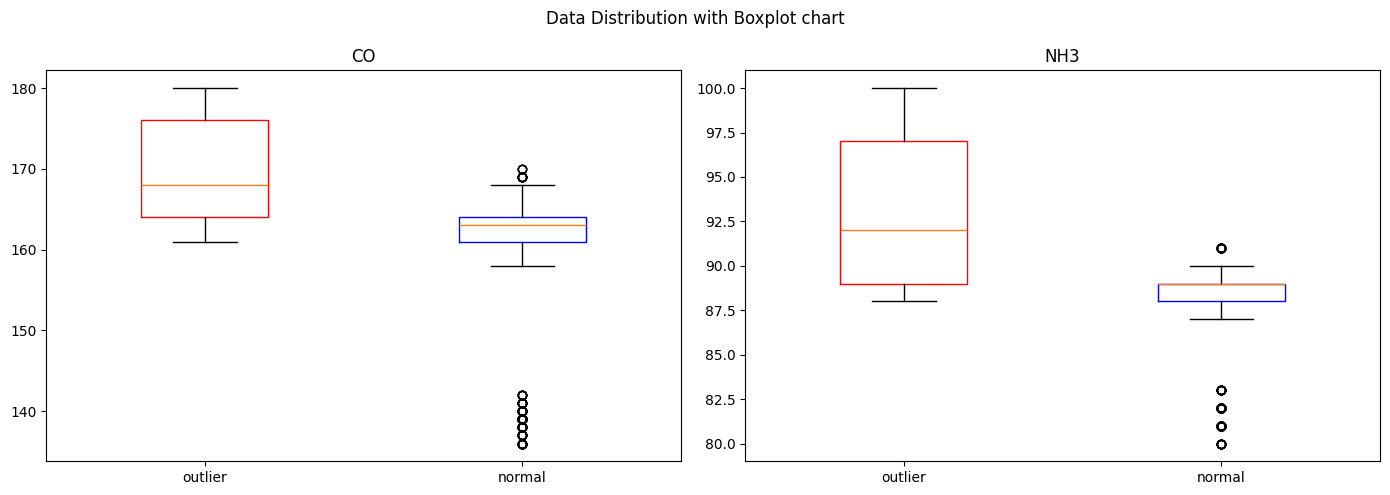

In [28]:
graph.boxchart(
    dfs=[dfoutl, dfnorm.iloc[:len(dfoutl)]],
    labels=["outlier", "normal"],
    cols=conf.COLUMN_COA,
    grid=(1, len(conf.COLUMN_COA)),
    pngfile="outl-norm-box-coa.png",
)

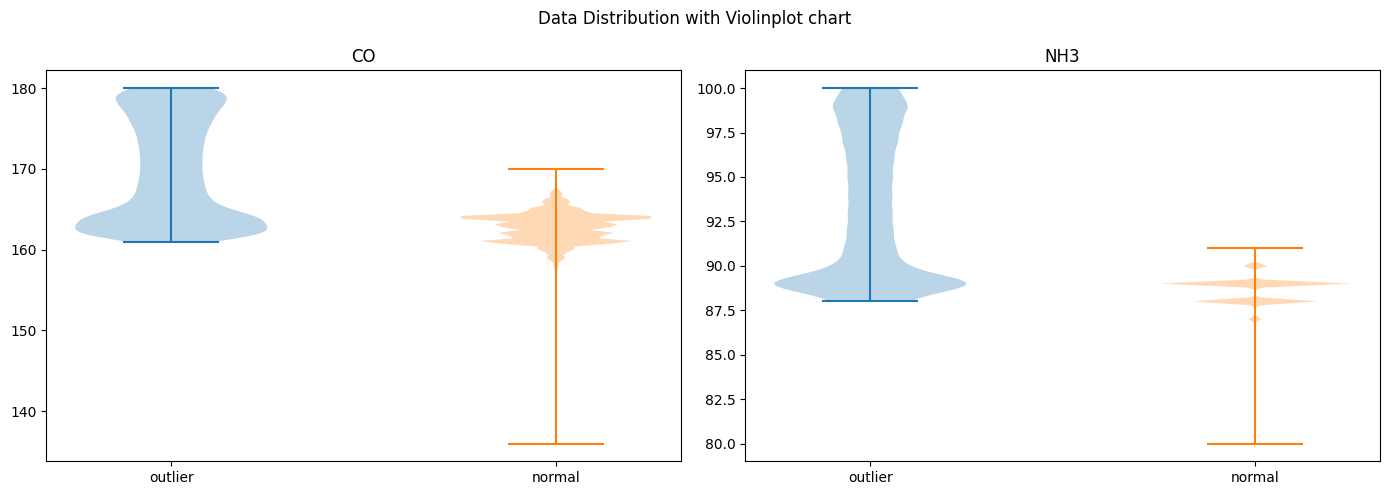

In [29]:
graph.violinchart(
    dfs=[dfoutl, dfnorm.iloc[:len(dfoutl)]],
    labels=["outlier", "normal"],
    cols=conf.COLUMN_COA,
    grid=(1, len(conf.COLUMN_COA)),
    pngfile="outl-norm-violin-coa.png",
)

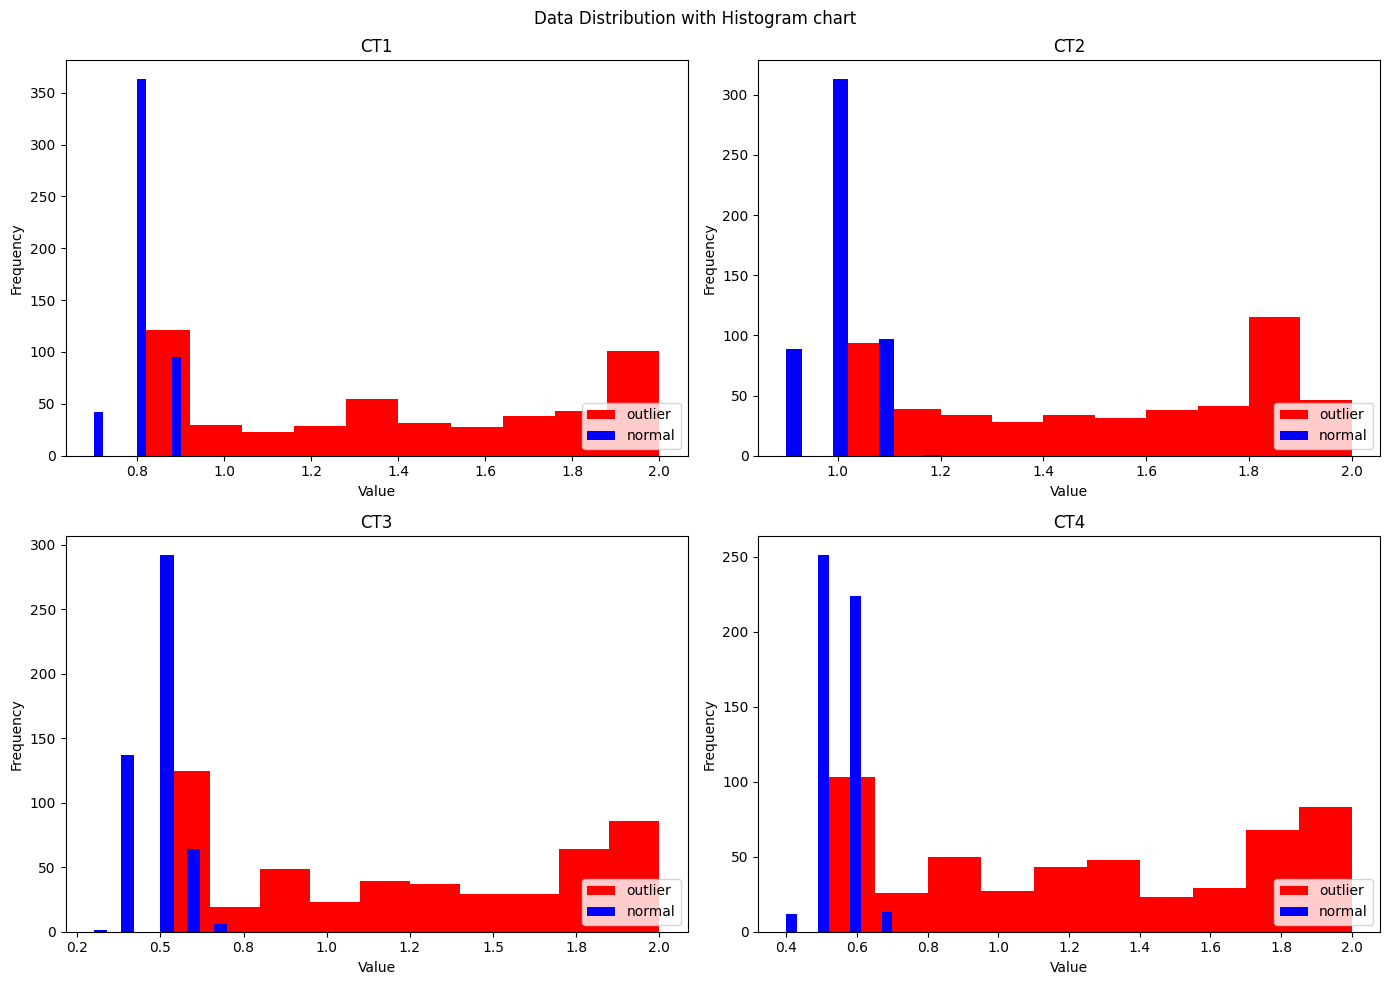

In [30]:
graph.histchart(
    dfs=[dfoutl[xs], dfnorm[xs]],
    labels=["outlier", "normal"],
    cols=conf.COLUMN_CTA,
    grid=(2, 2),
    pngfile="outl-norm-hist-cta.png",
)

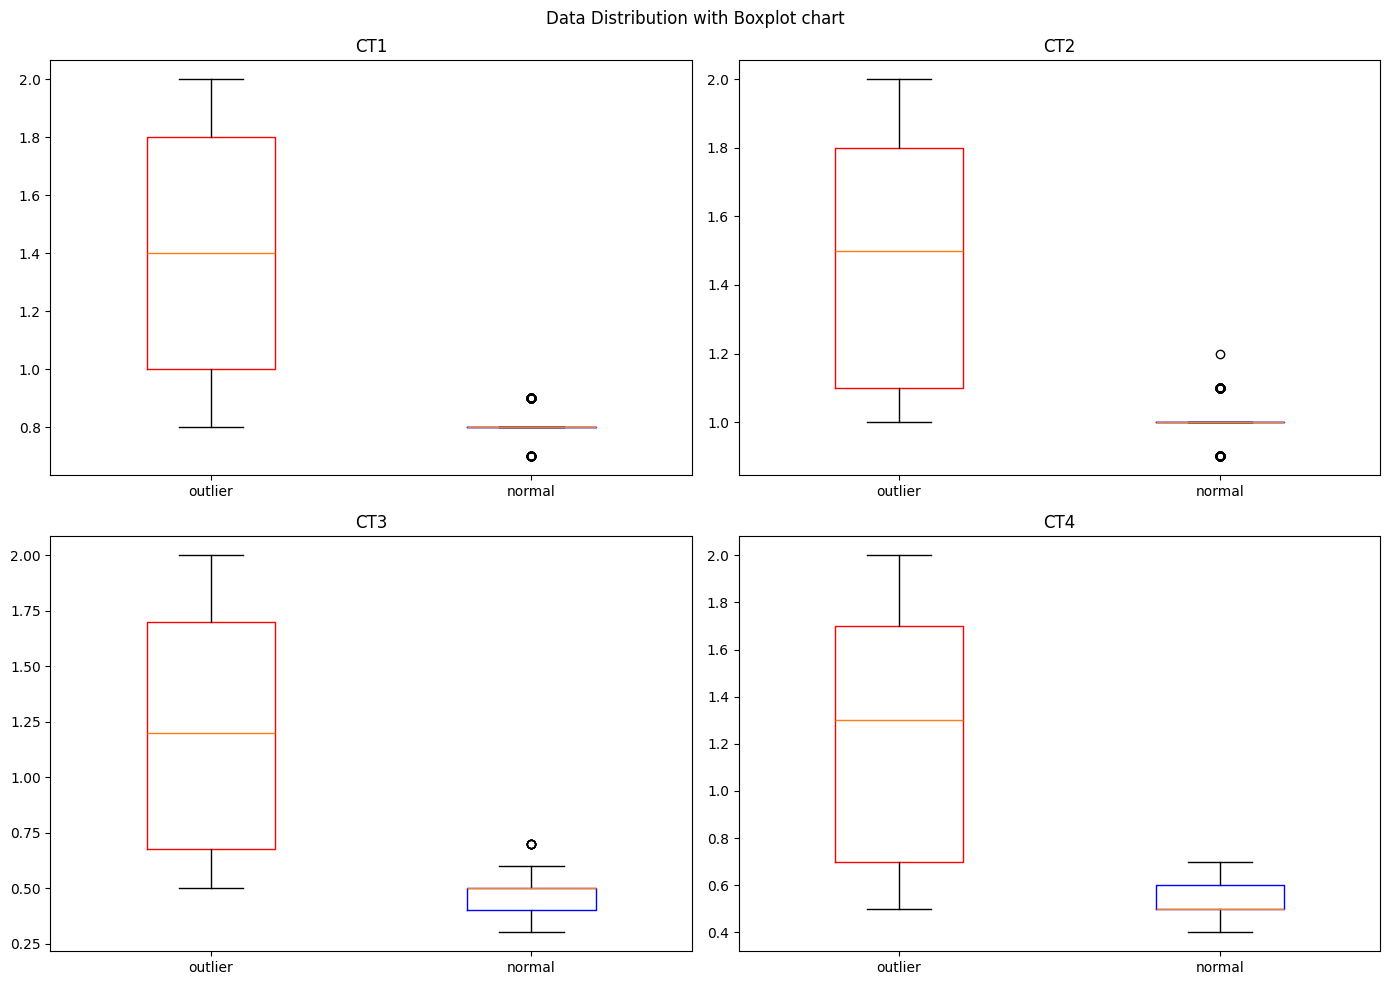

In [31]:
graph.boxchart(
    dfs=[dfoutl[xs], dfnorm[xs]],
    labels=["outlier", "normal"],
    cols=conf.COLUMN_CTA,
    grid=(2, 2),
    pngfile="outl-norm-box-cta.png",
)

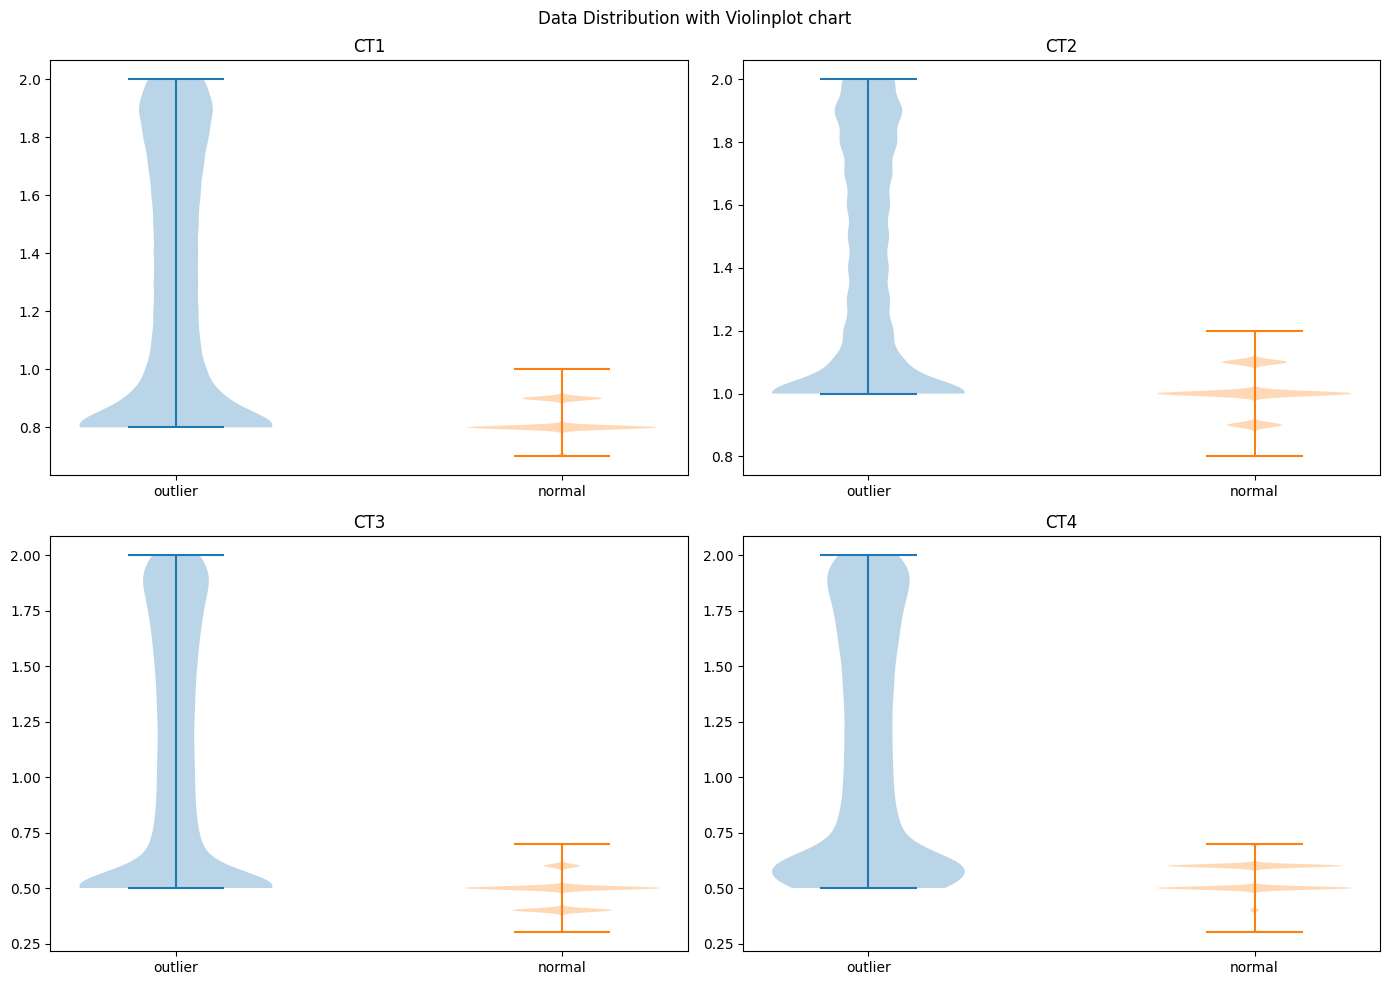

In [32]:
graph.violinchart(
    dfs=[dfoutl, dfnorm.iloc[:len(dfoutl)]],
    labels=["outlier", "normal"],
    cols=conf.COLUMN_CTA,
    grid=(2, 2),
    pngfile="outl-norm-violin-cta.png",
)

In [33]:
_elapsed = time.time() - mainstart
print(f"main elapsed time: {human.format_timespan(_elapsed)}")
# 23 sec. for conf.INPUT_MAXSIZE=400MB
# 28 sec. for conf.INPUT_MAXSIZE=650MB

main elapsed time: 11.93 seconds


### eof